In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [3]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.shape

(4177, 9)

In [5]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

In [11]:
lab_enc=LabelEncoder()

In [12]:
ohe=OneHotEncoder()

In [13]:
data['Sex']=lab_enc.fit_transform(data['Sex'])

In [ ]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

In [ ]:
from scipy.stats import zscore

In [ ]:
z_score=zscore(data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']])

In [42]:
abs_score=np.abs(z_score)
filtering_entry=(abs_score < 3).all(axis=1)

In [43]:
data=data[filtering_entry]

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_3808\3898699437.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data[filtering_entry]


In [44]:
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,1.050196,0.522090,0.406308,0.138530,0.808404,0.350172,0.176579,0.233142,9.901567
std,0.820493,0.115709,0.095848,0.037001,0.457321,0.205827,0.103336,0.129482,3.164617
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441000,0.185375,0.092875,0.130000,8.000000
50%,1.000000,0.540000,0.420000,0.140000,0.790750,0.332000,0.168500,0.230000,9.000000
75%,2.000000,0.610000,0.480000,0.165000,1.134750,0.494000,0.247000,0.320500,11.000000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,29.000000


In [45]:
data.shape

(4084, 9)

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

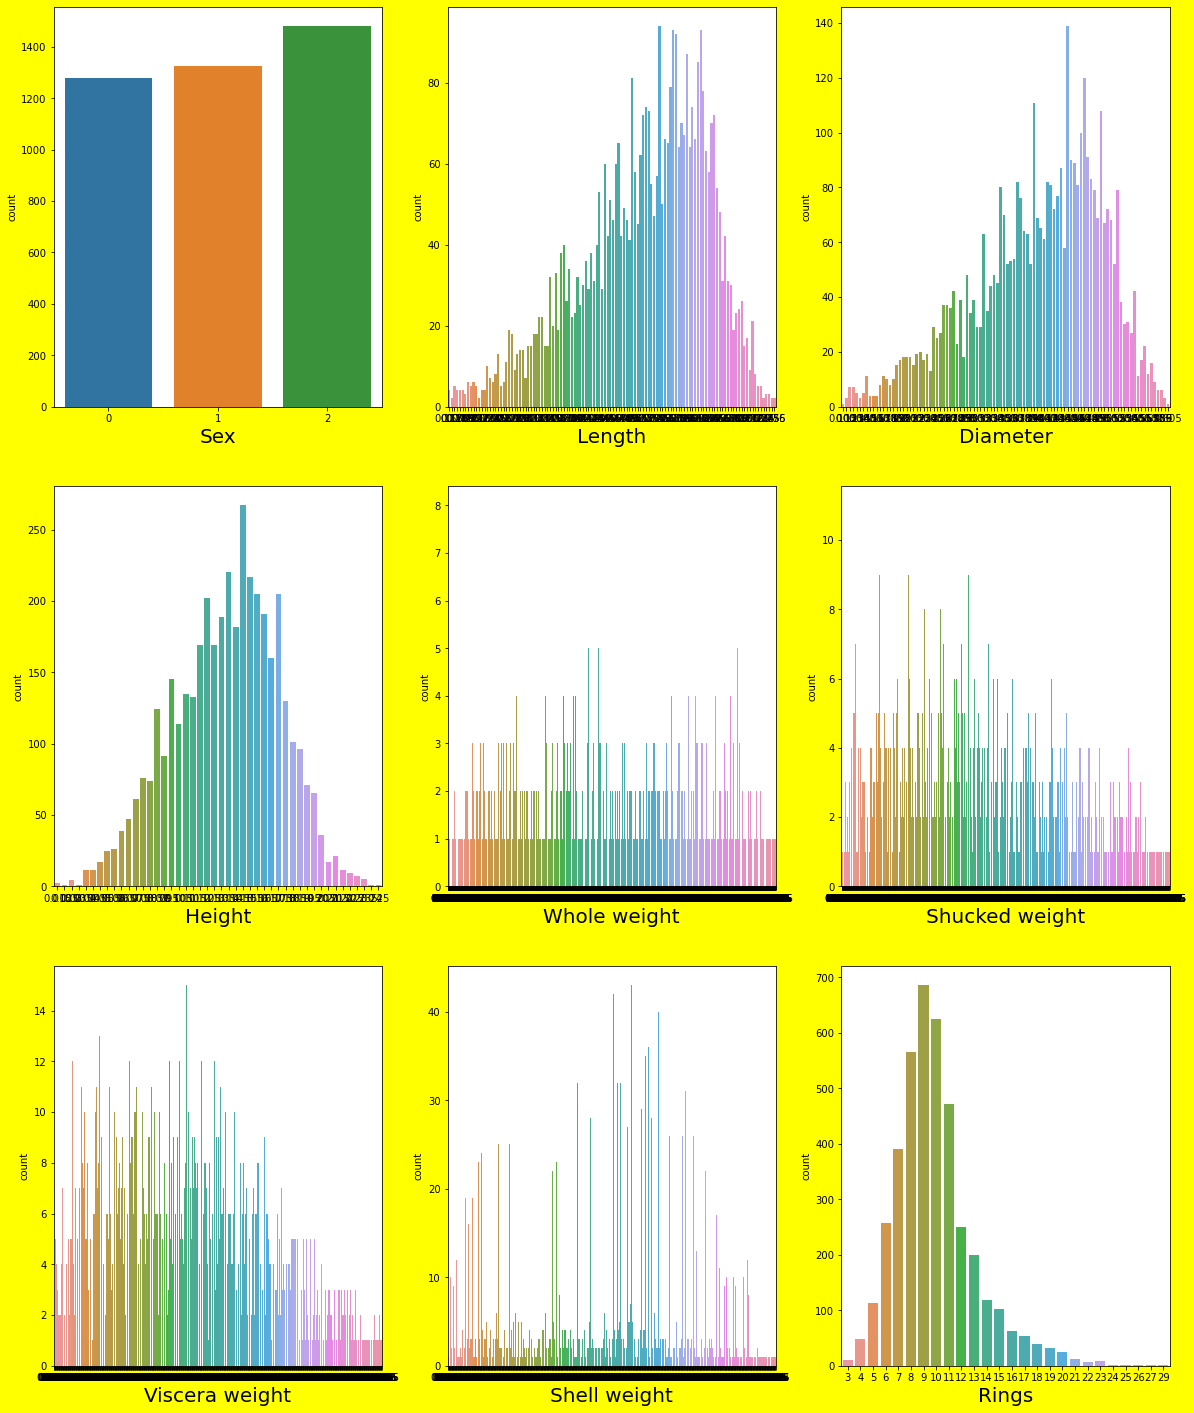

In [46]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [47]:
X=data.drop(columns=['Rings'])
y=data['Rings']

In [48]:
scalar=StandardScaler()

In [49]:
X_scaled=scalar.fit_transform(X)

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4084 non-null   int32  
 1   Length          4084 non-null   float64
 2   Diameter        4084 non-null   float64
 3   Height          4084 non-null   float64
 4   Whole weight    4084 non-null   float64
 5   Shucked weight  4084 non-null   float64
 6   Viscera weight  4084 non-null   float64
 7   Shell weight    4084 non-null   float64
dtypes: float64(7), int32(1)
memory usage: 271.2 KB


In [51]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [52]:
X_scaled.shape

(4084, 8)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.7,random_state=40)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
clf= RandomForestClassifier()

In [56]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
y_pred=clf.predict(x_test)

In [58]:
y_pred

array([ 9,  6, 10, ...,  7,  9, 11], dtype=int64)

In [59]:
accuracy=accuracy_score(y_test,y_pred)

In [60]:
def metric_score(clf,X_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(X_train)
        print("Accuracy score:{accuracy_score(y_train,y_pred)}")
    
     
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print("Accuracy Score:{accuracy_score(y_test,pred)* 100}")
        print("Test Classification Report",classification_report(y_test,pred,digits=2))

In [61]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)

Accuracy score:{accuracy_score(y_train,y_pred)}
Accuracy Score:{accuracy_score(y_test,pred)* 100}
Test Classification Report               precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.33      0.33      0.33        33
           5       0.36      0.36      0.36        80
           6       0.25      0.31      0.28       175
           7       0.28      0.39      0.33       269
           8       0.31      0.30      0.30       408
           9       0.24      0.26      0.25       488
          10       0.19      0.25      0.21       426
          11       0.20      0.25      0.22       320
          12       0.14      0.06      0.09       176
          13       0.05      0.03      0.04       133
          14       0.08      0.03      0.05        87
          15       0.05      0.01      0.02        74
          16       0.09      0.04      0.06        45
          17       0.08      0.02      0.04        43
          

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid_param={'criterion':['gini','entropy'],'max_depth':[2,5],'min_samples_leaf':[2,10],
            'min_samples_split':[3,11],
            'max_leaf_nodes':[5,10]}

In [64]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5)

In [65]:
grid_search.fit(x_train,y_train)

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 5],
                         'max_leaf_nodes': [5, 10], 'min_samples_leaf': [2, 10],
                         'min_samples_split': [3, 11]})

In [67]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 11}